# Draw Tracks


In [97]:
import turtle as tractor
import numpy as np

# Sample solution
solution = [0, 15, 19, 14, 17, 13, 16, 11, 8, 12, 10, 7, 3, 6, 9, 5, 2, 4, 18, 1]
turns = [0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]

# solution = [0, 1, 5, 4,2,3]
# turns = [1, 1, 1, 1, 1, 1]

tractor.setup(1920, 1080, 0, 0)
tractor.screensize(3000, 2500)
tractor.color("green")

# tractor.textinput("title", "Press enter to start")

start_x = -480
start_y = 0
width = 25
height = 100
speed = 9
# track_dictionary ={
#     "track" : 0,
#     "top":{
#         "x": 0,
#         "y": 0
#     },
#     "down": {
#         "x": 0,
#         "y": 0
#     }
# }

track_dictionary = {}

tractor.speed(speed)
tractor.penup()
tractor.goto(0, 300)
tractor.write('solution' + str(solution), align="center",  font=("Arial", 24, "normal"))


def start_pos():
    tractor.right(90)
    tractor.up()
    tractor.setpos(start_x, start_y)
    tractor.down()
    tractor.width(2)



start_pos()


def draw_track(x, y, label):
    tractor.up()
    tractor.goto(x, y)
    tractor.down()
    tractor.forward(height)
    tractor.write(label, align="center")
    tractor.up()
    tractor.setpos(x, y)
    tractor.down()
    tractor.backward(height)



def create_arc(tractor, x1, y1, x2, y2, start, extent=90):
    tractor.color('orange')
    radius = abs(x1-x2)  / 2
    cx, cy = x1 + (x2 - x1) / 2, y1 + (y2 - y1) / 2

    tractor.penup()
    # tractor.setposition(max(x1, x2), cy)
    # tractor.setheading(90)
    # tractor.pendown()
    # tractor.circle(radius, extent=start)
    # position = tractor.position()
    if(start == 'left_up'):
        tractor.setposition(max(x1, x2), cy)
        tractor.setheading(90)
        tractor.pendown()
    elif(start == 'right_up'):
        tractor.setposition(min(x1, x2), cy)
        tractor.setheading(270)
        tractor.pendown()
    elif(start == 'left_down'):
        tractor.setposition(min(x1, x2), cy)
        tractor.setheading(270)
        tractor.pendown()
    elif(start == 'right_down'):
        tractor.setposition(max(x1, x2), cy)
        tractor.setheading(90)
        tractor.pendown()

    tractor.circle(radius, extent=extent)
    tractor.penup()
    # tractor.pendown()
    # tractor.circle(radius, extent=extent)
    # tractor.penup()
    # tractor.setposition(cx, cy)
    # tractor.setposition(position)


def create_omega_top(tractor, x1, y1, x2, y2, start, extent=90):
    tractor.color('blue')
    radius = abs(x1-x2) / 2
    cx, cy = x1 + (x2 - x1) / 2, y1 + (y2 - y1) / 2

    tractor.penup()
    # tractor.pendown()
    if(start == 'left'):
        tractor.setposition(max(x1, x2), cy)
        tractor.setheading(90)
        tractor.pendown()
        tractor.forward(20)
        tractor.right(30)
    elif(start == 'right'):
        tractor.setposition(min(x1, x2), cy)
        tractor.setheading(270)
        tractor.pendown()
        tractor.backward(20)
        tractor.left(30)
    tractor.circle(12+radius, extent=extent)
    # tractor.left(30)
    tractor.goto(x2, y2+100)
    position = tractor.position()

    # tractor.pendown()
    tractor.penup()
    # tractor.circle(radius, extent=extent)
    # tractor.setposition(cx, cy)
    tractor.setposition(position)

def create_omega_down(tractor, x1, y1, x2, y2, start, extent=90):
    tractor.color('blue')
    radius = abs(x1-x2) / 2
    cx, cy = x1 + (x2 - x1) / 2, y1 + (y2 - y1) / 2

    tractor.penup()
    # tractor.pendown()
    if(start == 'right'):
        tractor.setposition(max(x1, x2), cy)
        tractor.setheading(90)
        tractor.pendown()
        tractor.backward(20)
        tractor.left(30)
    elif(start == 'left'):
        tractor.setposition(min(x1, x2), cy)
        tractor.setheading(270)
        tractor.pendown()
        tractor.forward(20)
        tractor.right(30)
    tractor.circle(12+radius, extent=extent)
    # tractor.left(30)
    tractor.goto(x2, y2+100)
    position = tractor.position()

    tractor.pendown()
    # tractor.penup()
    # tractor.circle(radius, extent=extent)
    # tractor.setposition(cx, cy)
    tractor.setposition(position)


for i, track in enumerate(solution):
    x = start_x + (i * (width + 20))
    y = start_y
    label = ""
    if i == solution[0] :
        label = "Start"
    elif i == solution[len(solution) - 1]:
        label = "End"
    track_dictionary[i] = {
        "track": track,
        "top": {"x": x, "y": y + height * 2},
        "down": {"x": x, "y": y},
    }
    draw_track(x, y, label)


for i in range(len(solution) - 1):

    if i == len(track_dictionary) - 1:
        break
    if i % 2 == 0:
        if(turns[i] == 0):
            if(solution[i] > solution[i+1] ):
                create_arc(
                    tractor,
                    track_dictionary[solution[i]]["top"]["x"],
                    track_dictionary[solution[i]]["top"]["y"],
                    track_dictionary[solution[i + 1]]["down"]["x"],
                    track_dictionary[solution[i + 1]]["down"]["y"],
                    start='left_up',
                    extent=180,
                )
            else:
                create_arc(
                    tractor,
                    track_dictionary[solution[i]]["top"]["x"],
                    track_dictionary[solution[i]]["top"]["y"],
                    track_dictionary[solution[i + 1]]["down"]["x"],
                    track_dictionary[solution[i + 1]]["down"]["y"],
                    start='right_up',
                    extent=-180,
                )
        else:
            if(solution[i] > solution[i+1] ):
                create_omega_top(
                tractor,
                track_dictionary[solution[i]]["top"]["x"],
                track_dictionary[solution[i]]["top"]["y"],
                track_dictionary[solution[i + 1]]["down"]["x"],
                track_dictionary[solution[i + 1]]["down"]["y"],
                start='left',
                extent=240,
                )
            else:
                create_omega_top(
                tractor,
                track_dictionary[solution[i]]["top"]["x"],
                track_dictionary[solution[i]]["top"]["y"],
                track_dictionary[solution[i + 1]]["down"]["x"],
                track_dictionary[solution[i + 1]]["down"]["y"],
                start='right',
                extent=-240,
                )


        # create_arc(tractor, track_dictionary[solution[i]]['top']['x'], track_dictionary[solution[i]]['top']['y'], track_dictionary[solution[i+1]]['down']['x'], track_dictionary[solution[i+1]]['down']['y'], start=180, extent=-180)
        # create_omega(
        #     tractor,
        #     track_dictionary[solution[i]]["top"]["x"],
        #     track_dictionary[solution[i]]["top"]["y"],
        #     track_dictionary[solution[i + 1]]["down"]["x"],
        #     track_dictionary[solution[i + 1]]["down"]["y"],
        #     start=-180,
        #     extent=-220,
        # )
    else:
        if(turns[i] == 0):
            if(solution[i] > solution[i+1] ):
                create_arc(
                tractor,
                track_dictionary[solution[i]]["down"]["x"],
                track_dictionary[solution[i]]["down"]["y"],
                track_dictionary[solution[i + 1]]["top"]["x"],
                -200,
                start='right_down',
                extent=-180,
                )
            else:
                                create_arc(
                tractor,
                track_dictionary[solution[i]]["down"]["x"],
                track_dictionary[solution[i]]["down"]["y"],
                track_dictionary[solution[i + 1]]["top"]["x"],
                -200,
                start='left_down',
                extent=180,
                )
        else:
            if(solution[i] > solution[i+1] ):
                create_omega_down(
                    tractor,
                    track_dictionary[solution[i]]["down"]["x"],
                    track_dictionary[solution[i]]["down"]["y"],
                    track_dictionary[solution[i + 1]]["top"]["x"],
                    -200,
                    start='right',
                    extent=-240,
                    )
            else:   
                create_omega_down(
                    tractor,
                    track_dictionary[solution[i]]["down"]["x"],
                    track_dictionary[solution[i]]["down"]["y"],
                    track_dictionary[solution[i + 1]]["top"]["x"],
                    -200,
                    start='left',
                    extent=240,
                    )

        # create_arc(
        #     tractor,
        #     track_dictionary[solution[i]]["down"]["x"],
        #     track_dictionary[solution[i]]["down"]["y"],
        #     track_dictionary[solution[i + 1]]["top"]["x"],
        #     -200,
        #     start=-180,
        #     extent=180,
        # )

# create_arc(tractor, -480, 200, -435, 0, 0, 180)

# print (track_dictionary)
for i in track_dictionary:
    print(i, track_dictionary[i])

tractor.done()

0 {'track': 0, 'top': {'x': -480, 'y': 200}, 'down': {'x': -480, 'y': 0}}
1 {'track': 15, 'top': {'x': -435, 'y': 200}, 'down': {'x': -435, 'y': 0}}
2 {'track': 19, 'top': {'x': -390, 'y': 200}, 'down': {'x': -390, 'y': 0}}
3 {'track': 14, 'top': {'x': -345, 'y': 200}, 'down': {'x': -345, 'y': 0}}
4 {'track': 17, 'top': {'x': -300, 'y': 200}, 'down': {'x': -300, 'y': 0}}
5 {'track': 13, 'top': {'x': -255, 'y': 200}, 'down': {'x': -255, 'y': 0}}
6 {'track': 16, 'top': {'x': -210, 'y': 200}, 'down': {'x': -210, 'y': 0}}
7 {'track': 11, 'top': {'x': -165, 'y': 200}, 'down': {'x': -165, 'y': 0}}
8 {'track': 8, 'top': {'x': -120, 'y': 200}, 'down': {'x': -120, 'y': 0}}
9 {'track': 12, 'top': {'x': -75, 'y': 200}, 'down': {'x': -75, 'y': 0}}
10 {'track': 10, 'top': {'x': -30, 'y': 200}, 'down': {'x': -30, 'y': 0}}
11 {'track': 7, 'top': {'x': 15, 'y': 200}, 'down': {'x': 15, 'y': 0}}
12 {'track': 3, 'top': {'x': 60, 'y': 200}, 'down': {'x': 60, 'y': 0}}
13 {'track': 6, 'top': {'x': 105, 'y':

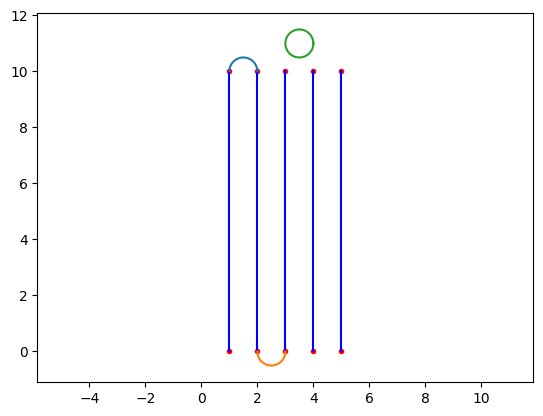

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(
    [
        [1, 0],
        [1, 10],
        [2, 10],
        [2, 0],
        [3, 0],
        [3, 10],
        [4, 10],
        [4, 0],
        [5, 0],
        [5, 10],
    ]
)

# Plot points
plt.plot(data[:, 0], data[:, 1], ".r")

# Draw lines
plt.plot(data[0:2, 0], data[0:2, 1], "b")
plt.plot(data[2:4, 0], data[2:4, 1], "b")
plt.plot(data[4:6, 0], data[4:6, 1], "b")
plt.plot(data[6:8, 0], data[6:8, 1], "b")
plt.plot(data[8:10, 0], data[8:10, 1], "b")

# Draw curves
th = np.linspace(0, np.pi)
c1 = np.sum(data[1:3, :], axis=0) / 2
r = 0.5
a1 = np.array([r * np.cos(th) + c1[0], r * np.sin(th) + c1[1]])
plt.plot(a1[0, :], a1[1, :])

c2 = np.sum(data[3:5, :], axis=0) / 2
a2 = np.array([r * np.cos(-th) + c2[0], r * np.sin(-th) + c2[1]])
plt.plot(a2[0, :], a2[1, :])

c3 = np.sum(data[5:7, :], axis=0) / 2
a3 = np.array([r * np.cos(2 * th) + c3[0], r * np.sin(2 * th) + c3[1] + 1])
plt.plot(a3[0, :], a3[1, :])

plt.axis("equal")
plt.show()

In [1]:
from random import randint
from tkinter import *
from turtle import ScrolledCanvas, RawTurtle, TurtleScreen

health = 50
damage = 10
fight = randint(10, 20)
step = 0

def up():
    global step

    if step == fight:
        combat()
    step += 1
    turtle.seth(90)
    turtle.forward(10)

def down():
    global step

    if step == fight:
        combat()
    step += 1
    turtle.seth(-90)
    turtle.forward(10)

def left():
    global step

    if step == fight:
        combat()
    step += 1
    turtle.seth(180)
    turtle.forward(10)

def right():
    global step

    if step == fight:
        combat()
    step += 1
    turtle.seth(0)
    turtle.forward(10)

def combat():
    enemy = RawTurtle(canvas)
    enemy.up()
    eHealth = randint(20, 100)
    eDamage = randint(10, 20)

root = Tk()
canvas = ScrolledCanvas(root)
canvas.pack(side=LEFT)
screen = TurtleScreen(canvas)
turtle = RawTurtle(canvas)
turtle.up()

screen.onkey(up, "Up")
screen.onkey(down, "Down")
screen.onkey(left, "Left")
screen.onkey(right, "Right")
screen.listen()

: 

In [1]:
import tkinter as tk
from turtle import TurtleScreen, RawTurtle

def set_position():
    player.setposition(x_entry.get(), y_entry.get())
    player.dot(30, 'blue')
    player.home()

top = tk.Tk()

canvas = tk.Canvas(top, width=600, height=600)
canvas.pack()

screen = TurtleScreen(canvas)
screen.bgcolor('black')

player = RawTurtle(screen)
player.shape('turtle')
player.color('red', 'white')
player.penup()

x_entry = tk.DoubleVar()
tk.Label(top, text="X: ").pack(side=tk.LEFT)
tk.Entry(top, textvariable=x_entry).pack(side=tk.LEFT)

y_entry = tk.DoubleVar()
tk.Label(top, text="Y: ").pack(side=tk.LEFT)
tk.Entry(top, textvariable=y_entry).pack(side=tk.LEFT)

tk.Button(top, text="Draw Dot!", command=set_position).pack()

screen.mainloop()

In [25]:
import numpy as np

N = 8
rand_vals = np.random.randint(2, size=10)

# I would go with:
out = np.array(rand_vals)

print(out.tolist())

[[0.0820004604429392], [-0.6285971084032588], [0.3030358634864433], [0.10609994970452766], [0.8814062659874555], [0.687443486053697], [0.7953794433743381], [-0.6566185353867451]]


In [31]:
import random

random_float_list = []
# Set a length of the list to 10
for i in range(0, 10):
    # any random float between 50.50 to 500.50
    # don't use round() if you need number as it is
    x = round(random.uniform(1, 20), 0)
    random_float_list.append(x)

print(random_float_list)
# Output [98.01, 454.48, 117.69, 51.44, 415.01, 455.52, 65.39, 385.07, 112.38, 434.1]

[13.0, 6.0, 11.0, 1.0, 18.0, 1.0, 6.0, 12.0, 11.0, 15.0]


In [40]:
import random

solution = []
turns = []
for i in range(0, 20):
    # any random float between 50.50 to 500.50
    # don't use round() if you need number as it is
        x = random.sample(range(10, 21), 1)
        solution.append(x)

for i in range(0,20):
    # any random float between 50.50 to 500.50
    # don't use round() if you need number as it is
        x = round(random.uniform(0,1), 0)
        turns.append(x)

print(solution)

# for i in solution:
#     print(solution[i])       

[[20], [11], [16], [11], [19], [11], [17], [18], [14], [19], [16], [19], [14], [11], [18], [15], [15], [20], [17], [12]]


In [42]:
for i in range(len(solution)-1):
    print(i, solution[i], turns[i])

0 0 0
1 1 0
2 5 0
3 4 0
4 2 0
